# Collect and Plot data from simulation parametric sweeps

In [25]:
# Collate data from parametric sweeps for combined analysis plots
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from tqdm import tqdm
import pandas as pd

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

# Folder containing data
# data_folder = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/BendingStiffnessSweeps/b0_4_activity_time_2000'

# data_folder = '/home/deepak/LacryModelling_Local/SimulationData_ForAnalysis/BendingStiffnessSweeps/b0_2_1/activity_time_750'
# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000/2021-02-27'

# data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/b0_4_activity_time_2000'
data_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/BendingStiffnessSweeps/AnalysisData'

# Parameters that are saved in the final dataframe
parameter = 'spring constant'
data_name = 'Unique positions count'

df_param_sweep = {}

# Interpolation for time-series data
n_times = 1000

mu  = 1/6
radius = 1
b0 = 4*radius
L = 32*b0
D0 = 1.5


# Find all simulation data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files
for dirs, subdirs, files in os.walk(data_folder, topdown=False):
   
    root, subFolderName = os.path.split(dirs)
 
    if('SearchCoverage' in subFolderName):
        
        root, *rest = os.path.split(root)
   
        # Get the metadata for this condition
        df_metadata = pd.read_csv(os.path.join(root, 'metadata.csv'))
           
        print(df_metadata['spring constant'][0])
        activity_time = df_metadata[' activity time scale'][0]
        Np =  df_metadata['N particles'][0]
        b0 =  df_metadata['bond length'][0]
        
        df_param_sweep[df_metadata[parameter][0]] = pd.DataFrame({})
        
        count = 1
        for file in files:
            if('timeseries' in file):
                # Load the time-series data
                df_current = pd.read_csv(os.path.join(dirs,file))
                time = df_current['Time']
                data = df_current[data_name]
                
                data_fun = interpolate.interp1d(time, data, kind = 'linear')
                
                time_vect_sampled = np.linspace(np.min(time), np.max(time), n_times)
                
                data_sampled = data_fun(time_vect_sampled)
                
                df_sampled = pd.DataFrame({'Time':time_vect_sampled, 'Initial condition': np.repeat(count, n_times), data_name: data_sampled})
                df_param_sweep[df_metadata[parameter][0]] = df_param_sweep[df_metadata[parameter][0]].append(df_sampled)
                count +=1 
    
# # for file in tqdm(files_list):
	
# def run_filament_analysis(file):
# 	print('Analyzing file ...')
# 	print(file)

# 	filament = analysis.analysisTools(file = file)
# 	filament.filament_tip_coverage(save = True)


# num_cores = multiprocessing.cpu_count()

# num_cores = 12

# results = Parallel(n_jobs=num_cores,  verbose=10)(delayed(run_filament_analysis)(file) for file in tqdm(files_list))


25.0
35.0
45.0
55.0
60
65
70
100
80


In [2]:
df_param_sweep

{25.0:                Time  Initial condition  Unique positions count
 0          0.000000                  1                  1.0000
 1       1001.001001                  1                 58.1001
 2       2002.002002                  1                 83.0000
 3       3003.003003                  1                134.0000
 4       4004.004004                  1                141.0000
 ..              ...                ...                     ...
 995   995995.995996                  3                612.0000
 996   996996.996997                  3                612.0000
 997   997997.997998                  3                612.0000
 998   998998.998999                  3                612.0000
 999  1000000.000000                  3                612.0000
 
 [3000 rows x 3 columns],
 35.0:                Time  Initial condition  Unique positions count
 0          0.000000                  1                  1.0000
 1       1001.001001                  1                 43.1001


In [26]:
# Path for saving data
# save_folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/Plots/CombinedAnalysis'
save_folder = '/media/deepak/DEEPAK-1TB/ActiveFilaments_Simulations_Backup/Analysis_Plots/CombinedAnalysis'
len(df_param_sweep)

9

# Time series of unique locations sampled

<IPython.core.display.Javascript object>


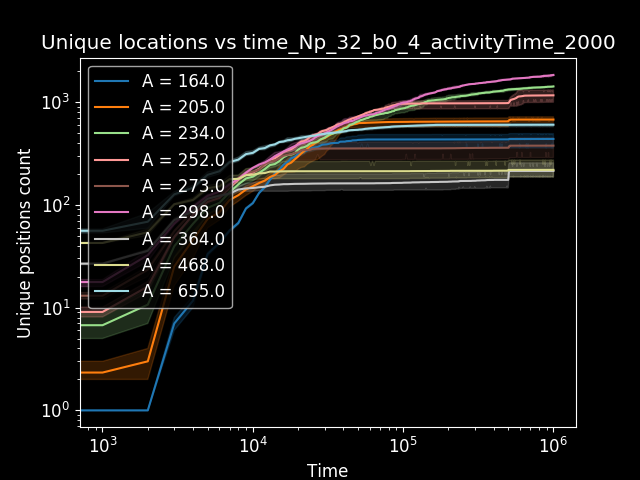

100%|██████████| 9/9 [03:05<00:00, 20.61s/it]


In [34]:
# Plot the timer-series of unique locations sampled

plt.style.use('dark_background')
cmap = cm.get_cmap('tab20')
# cmap = sns.color_palette("husl", 255, as_cmap = True)
colors = [cmap(ii) for ii in np.linspace(0,1, len(df_param_sweep))]

title = 'Unique locations vs time' + '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time) 
plt.figure()
count = 0
for key in tqdm(sorted(df_param_sweep.keys(), reverse = True)):
    kappa = 0.25*key
    activity_number = (mu*radius**3*L**2*D0/kappa)
    sns.lineplot(data = df_param_sweep[key], x = 'Time', y = 'Unique positions count', color = colors[count], label = 'A = {}'.format(round(activity_number)))
    count+=1

plt.title(title)
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

plt.xscale('log')
plt.yscale('log')
plt.savefig(os.path.join(save_folder, title +'loglog' + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + 'loglog' + '.svg'), dpi = 300)

    
    

# Max unique locations sampled

In [20]:
# Plot of max unique locations sampled vs filament stiffness
df_unique_locs = pd.DataFrame({})
for key in tqdm(sorted(df_param_sweep.keys())):
    
    n_init_cond = max(df_param_sweep[key]['Initial condition'])
    
    for ii in range(n_init_cond):
        
        max_data = np.max(df_param_sweep[key].loc[df_param_sweep[key]['Initial condition']==ii+1, data_name])
        kappa = 0.25*key
        activity_number = (mu*radius**3*L**2*D0/kappa)

        df_unique_locs = df_unique_locs.append(pd.DataFrame({parameter:[key], 'activity number': activity_number, 'Initial condition':[ii+1], data_name: [max_data], 'activity time':activity_time}))
    

df_unique_locs.to_csv(os.path.join(save_folder,'Max unique locations'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time)+'.csv'))

100%|██████████| 15/15 [00:00<00:00, 118.28it/s]


<IPython.core.display.Javascript object>


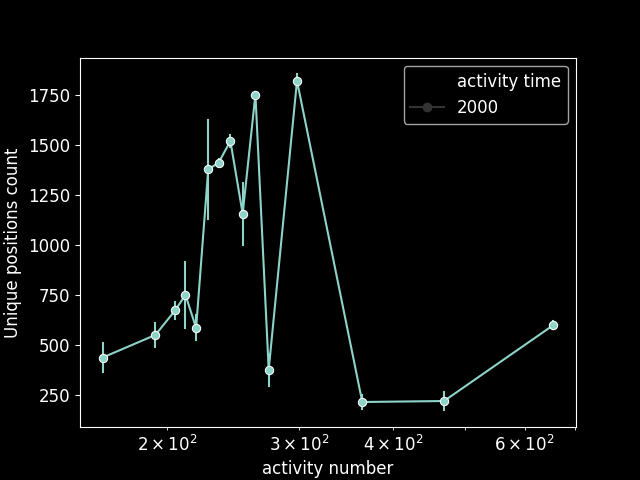

In [33]:
plt.style.use('dark_background')

title = 'Max unique locations vs activity number'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)+'_'+ 'activityTime_{}'.format(activity_time) 
plt.figure()
ax = sns.lineplot(data=df_unique_locs, x= 'activity number', y= data_name, style='activity time', err_style="bars", ci="sd", markers=True)

ax.set_xscale('log')
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()


In [117]:
# Plot unique locations vs stiffness for all activity time
folder = '/home/deepak/Dropbox/LacryModeling/ModellingResults/Plots/CombinedAnalysis/MaxUniqueLocations_combined_data'

files = os.listdir(folder)

df_combined = pd.DataFrame({})

for file in files:
    df = pd.read_csv(os.path.join(folder, file))
    df_combined = df_combined.append(df)

<IPython.core.display.Javascript object>


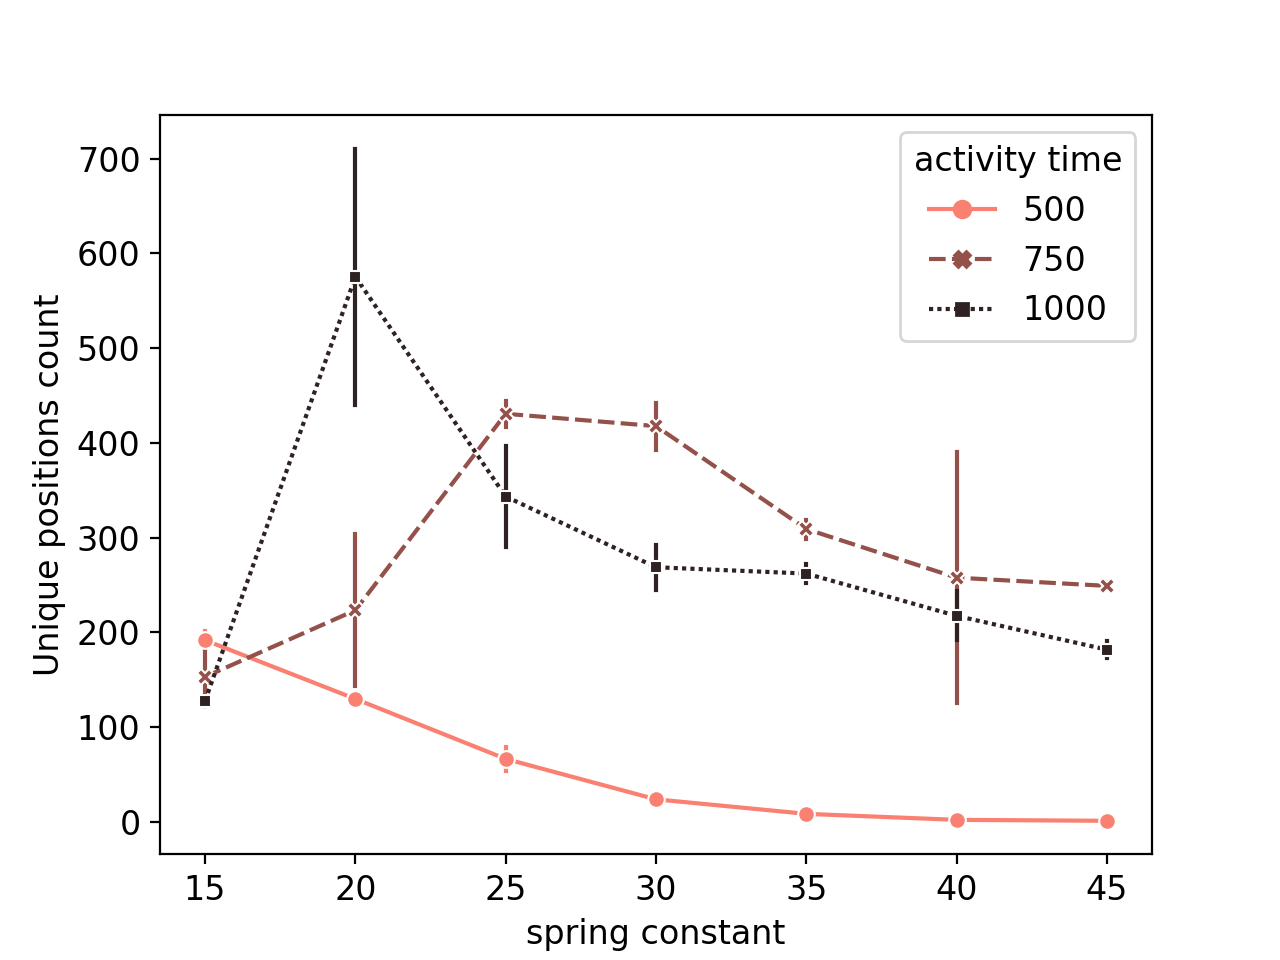

In [125]:
# Plot the unique locations vs stiffness for all activity time
title = 'Max unique locations vs filament stiffness_combined'+ '_' + 'Np_{}'.format(Np) + '_' + 'b0_{}'.format(b0)
plt.figure()
sns.lineplot(data=df_combined, x= parameter, y= data_name, style='activity time', hue = 'activity time', err_style="bars", ci="sd", markers=True, palette = "dark:salmon_r")
plt.savefig(os.path.join(save_folder, title + '.png'), dpi = 300)
plt.savefig(os.path.join(save_folder, title + '.svg'), dpi = 300)
plt.show()

# Plot search metrics and other dynamical measures as a function of one or more filament parameters